### Benchmark

In this notebook I try check some functions in respect of them execute time.
On the over hand I will present manual Python function versus in-build function.

In [1]:
# imports
import numpy as np
import matplotlib.pyplot as plt
import time
import timeit
import random
import math

In [2]:
# test function
def test_function(tested_function, n):
    before = time.time() 
    for i in range(1,n):
        tested_function
    after = time.time()
    print('Function run time: {:.3f} ms'.format((after - before)*1000.0))

In [3]:
# manual
def sum_manual(X):
    sum_ = 0
    for i in X:
        sum_ = sum_ + i
    return sum_

def length_manual(X):
    len_ = 0
    for i in X:
        len_ += 1
    return len_

def power_manual(a,b):
    power = a**b
    return power

def factorial_manual(n):
    if n == 0:
        return 1
    else:
        return n * factorial_manual(n-1)

def mean_manual(X):
    N,D = X.shape
    mean = np.zeros(D)
    for n in range(N):
        mean += X[n,:]
    mean = mean / N
    return mean

def cov_manual(X):
    N, D = X.shape
    covariance = np.zeros((D, D))
    mean = mean_manual(X)
    for n in range(N):
        diff = np.asmatrix(X[n, :] - mean)
        covariance += diff.T @ diff
    covariance = covariance / (N-1)
    return covariance

In [4]:
# in-built function
def sum_(X):
    sum_ = sum(X)
    return sum_

def length(X):
    len_ = len(X)
    return len_

def power(a,b):
    power = pow(a,b)
    return power

def factorial(n):
    factorial = math.factorial(n)
    return factorial
    
def mean(X):
    mean = np.mean(X, axis = 0)
    return mean

def cov(X):
    N, D = X.shape
    covariance_matrix = np.cov(X, rowvar=False)
    return covariance_matrix

In [5]:
# benchmarking
X = np.random.randn(100000, 20)

In [6]:
a = [random.randint(1,100) for x in range(200000)]
test_function(sum_manual(a), 1000)
test_function(sum_(a), 1000)

Function run time: 0.023 ms
Function run time: 0.024 ms


In [7]:
a = [random.randint(1,100) for x in range(200000)]
test_function(length_manual(a), 100000000)
test_function(length(a), 100000000)

Function run time: 2331.818 ms
Function run time: 2457.034 ms


In [8]:
a = np.random.randint(1,100, size=2000)
b = np.random.randint(1,100, size=2000)

test_function(power_manual(a,b), 100000000)
test_function(power(a,b), 100000000)

Function run time: 2454.188 ms
Function run time: 2454.489 ms


In [9]:
X = np.random.randn(100000, 20)
test_function(mean_manual(X), 100000000)
test_function(mean(X), 100000000)

Function run time: 2464.473 ms
Function run time: 2466.542 ms


In [10]:
X = np.random.randn(100000, 20)
test_function(cov_manual(X), 100000000)
test_function(cov(X), 100000000)

Function run time: 2466.700 ms
Function run time: 2469.929 ms


In [11]:
a = [random.randint(1,100) for x in range(2000)]

%time sum_manual(a)
%time sum_(a)
%time sum(a)
pass

CPU times: user 67 µs, sys: 2 µs, total: 69 µs
Wall time: 72.2 µs
CPU times: user 16 µs, sys: 0 ns, total: 16 µs
Wall time: 18.1 µs
CPU times: user 16 µs, sys: 0 ns, total: 16 µs
Wall time: 17.4 µs


In [12]:
a = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
%time sum_manual(a)
%time sum_(a)
%time sum(a)
pass

CPU times: user 11 µs, sys: 0 ns, total: 11 µs
Wall time: 13.4 µs
CPU times: user 9 µs, sys: 0 ns, total: 9 µs
Wall time: 11.2 µs
CPU times: user 8 µs, sys: 0 ns, total: 8 µs
Wall time: 10.7 µs


In sum additionaly check how it work with different list.

In [13]:
a = [random.randint(1,100) for x in range(2000)]
%time length_manual(a)
%time length(a)
%time len(a)
pass

CPU times: user 64 µs, sys: 2 µs, total: 66 µs
Wall time: 67.7 µs
CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.01 µs
CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 4.53 µs


In [14]:
a = random.randint(1,10)
b = random.randint(1,10)

%time power_manual(a,b)
%time power(a,b)
%time pow(a,b)
pass

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.25 µs
CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 5.48 µs
CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 4.77 µs


In [15]:
n = random.randint(1,10)

%time factorial_manual(n)
%time factorial(n)
%time math.factorial(n)
pass

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 6.44 µs
CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 5.96 µs
CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 4.53 µs


In [16]:
%time mean_manual(X)
%time mean(X)
pass

CPU times: user 156 ms, sys: 10 µs, total: 156 ms
Wall time: 155 ms
CPU times: user 4.46 ms, sys: 0 ns, total: 4.46 ms
Wall time: 2.39 ms


In [17]:
%time cov_manual(X)
%time cov(X)
pass

CPU times: user 2.19 s, sys: 0 ns, total: 2.19 s
Wall time: 2.19 s
CPU times: user 13.7 ms, sys: 0 ns, total: 13.7 ms
Wall time: 13.2 ms


In [18]:
# alternative way of name function
X_1 = np.arange(9).reshape(3,3)
X_2 = np.arange(9).reshape(3,3)

%time X_1 @ X_2
%time np.dot(X_1, X_2)
pass

CPU times: user 20 µs, sys: 0 ns, total: 20 µs
Wall time: 22.6 µs
CPU times: user 12 µs, sys: 0 ns, total: 12 µs
Wall time: 14.5 µs


In [19]:
X_1 = np.arange(9).reshape(3,3)

%time X_1.T
%time np.transpose(X_1)
pass

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 5.96 µs
CPU times: user 8 µs, sys: 0 ns, total: 8 µs
Wall time: 10 µs


In [20]:
m = [[3,8],[4,6]]

%time det = m[0][0] * m[1][1] - m[0][1] * m[1][0]
%time np.linalg.det(m)
pass

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 4.77 µs
CPU times: user 75 µs, sys: 2 µs, total: 77 µs
Wall time: 76.5 µs


In [21]:
def time(f, repeat=10):
    times = []
    for _ in range(repeat):
        start = timeit.default_timer()
        f()
        stop = timeit.default_timer()
        times.append(stop-start)
    return np.mean(times), np.std(times)

In [22]:
def time_plot(func, func_manual):
    fast_time = []
    slow_time = []

    for size in np.arange(100, 5000, step=100):
        X = np.random.randn(size, 20)
        f = lambda : func(X)
        mu, sigma = time(f)
        fast_time.append((size, mu, sigma))

        f = lambda : func_manual(X)
        mu, sigma = time(f)
        slow_time.append((size, mu, sigma))

    fast_time = np.array(fast_time)
    slow_time = np.array(slow_time)
    
    fig, ax = plt.subplots()
    ax.errorbar(fast_time[:,0], fast_time[:,1], fast_time[:,2], label='in-build', linewidth=2)
    ax.errorbar(slow_time[:,0], slow_time[:,1], slow_time[:,2], label='manual', linewidth=2)
    ax.set_xlabel('Size of dataset')
    ax.set_ylabel('Running time')
    plt.legend();

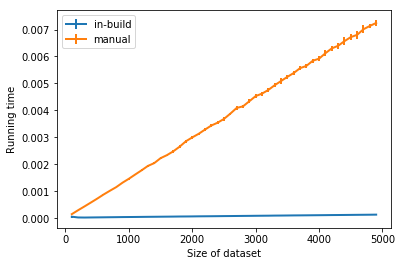

In [23]:
time_plot(mean, mean_manual)

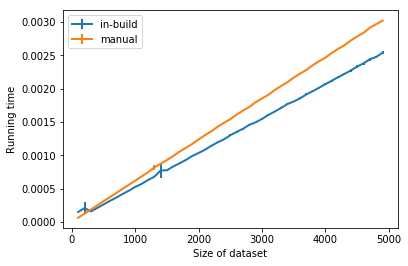

In [24]:
time_plot(sum_, sum_manual)

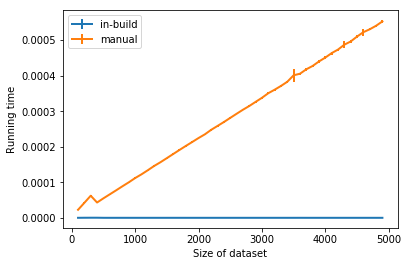

In [25]:
time_plot(length, length_manual)

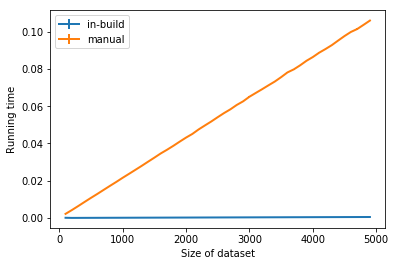

In [26]:
time_plot(cov, cov_manual)